<a href="https://colab.research.google.com/github/cavinlobo/AI-Agents-for-Medical-Diagnostics/blob/main/sentiment_analysis_on_amazon_reviews_using_nlp_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-fine-food-reviews/hashes.txt
/kaggle/input/amazon-fine-food-reviews/Reviews.csv
/kaggle/input/amazon-fine-food-reviews/database.sqlite


# 🧠 Sentiment Analysis on Amazon Reviews using NLP & Machine Learning

This project analyzes Amazon Fine Food Reviews to predict whether customer feedback is **Positive**, **Neutral**, or **Negative** using Natural Language Processing (NLP) and Machine Learning techniques.

**Libraries Used:** pandas, sklearn, re, matplotlib, seaborn  
**Algorithm:** TF-IDF + Logistic Regression


# 🧠 Sentiment Analysis on Amazon Reviews using NLP & Machine Learning

**Goal:** Predict whether a review is **Positive**, **Neutral**, or **Negative** using NLP + ML.

**Dataset:** Amazon Fine Food Reviews (Kaggle)  
**Libraries used:** pandas, numpy, scikit-learn, matplotlib, seaborn, re, joblib  
**Model:** TF-IDF vectorization + Logistic Regression

**Notebook structure**
1. Import libraries
2. Load dataset
3. Data cleaning & labeling
4. Train/test split
5. TF-IDF vectorization
6. Model training (Logistic Regression)
7. Evaluation & visualization
8. Save model
9. Conclusion / Resume line


In [ ]:
# 1) Imports
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Display settings
pd.set_option('display.max_colwidth', 300)
sns.set(style="whitegrid")

In [ ]:
# List files in input (optional, just to confirm path)
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/amazon-fine-food-reviews/hashes.txt
/kaggle/input/amazon-fine-food-reviews/Reviews.csv
/kaggle/input/amazon-fine-food-reviews/database.sqlite


In [ ]:
# 2) Load dataset (Kaggle path)
DATA_PATH = '/kaggle/input/amazon-fine-food-reviews/Reviews.csv'
df = pd.read_csv(DATA_PATH)

print("Full dataset shape:", df.shape)
df.head()


Full dataset shape: (568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly ..."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."


After selecting columns: (568454, 2)
Score
1     52268
2     29769
3     42640
4     80655
5    363122
Name: count, dtype: int64


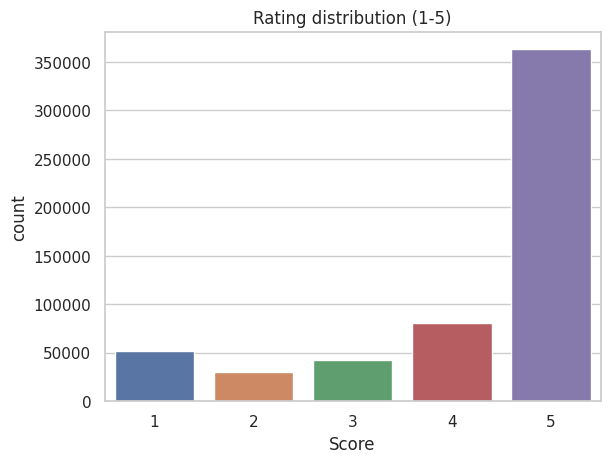

In [ ]:
# Keep only Text and Score for this project
df = df[['Text', 'Score']].dropna().reset_index(drop=True)
print("After selecting columns:", df.shape)

# Quick distribution of scores
print(df['Score'].value_counts().sort_index())
sns.countplot(x='Score', data=df)
plt.title("Rating distribution (1-5)")
plt.show()


Sentiment
Positive    443777
Negative     82037
Neutral      42640
Name: count, dtype: int64


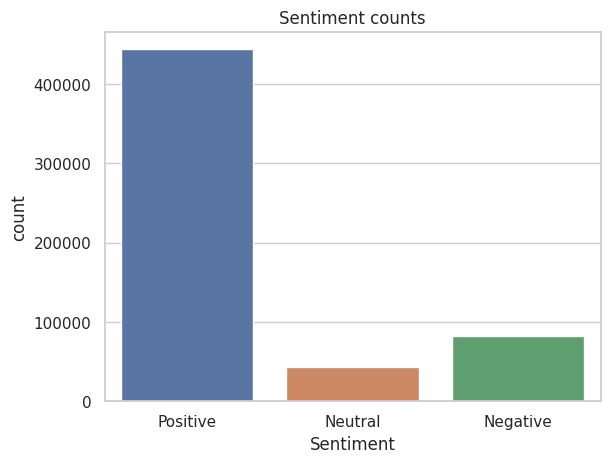

In [ ]:
# 3) Create sentiment label: 1-2 -> Negative, 3 -> Neutral, 4-5 -> Positive
def sentiment_label(score):
    if score <= 2:
        return 'Negative'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Positive'

df['Sentiment'] = df['Score'].apply(sentiment_label)
print(df['Sentiment'].value_counts())
sns.countplot(x='Sentiment', data=df, order=['Positive','Neutral','Negative'])
plt.title("Sentiment counts")
plt.show()


In [ ]:
# Optional: take sample to run faster on Kaggle (remove or increase if you want full dataset)
# If you want to run full dataset comment out the sampling lines.
SAMPLE = True   # Set to False to use full dataset (may be slow)
SAMPLE_SIZE = 50000   # change if you want a bigger sample

if SAMPLE:
    df = df.sample(n=SAMPLE_SIZE, random_state=42).reset_index(drop=True)
    print("Using sample dataset shape:", df.shape)
else:
    print("Using full dataset shape:", df.shape)


Using sample dataset shape: (50000, 3)


In [ ]:
# 4) Basic text cleaning
def clean_text(text):
    text = str(text).lower()
    # remove HTML tags
    text = re.sub(r'<.*?>', ' ', text)
    # remove non-letters
    text = re.sub(r'[^a-z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply cleaning
df['Clean_Text'] = df['Text'].apply(clean_text)
df[['Text','Clean_Text']].head(5)


,Text,Clean_Text
0,"Having tried a couple of other brands of gluten-free sandwich cookies, these are the best of the bunch. They're crunchy and true to the texture of the other ""real"" cookies that aren't gluten-free. Some might think that the filling makes them a bit too sweet, but for me that just means I've sat...",having tried a couple of other brands of gluten free sandwich cookies these are the best of the bunch they re crunchy and true to the texture of the other real cookies that aren t gluten free some might think that the filling makes them a bit too sweet but for me that just means i ve satisfied m...
1,"My cat loves these treats. If ever I can't find her in the house, I just pop the top and she bolts out of wherever she was hiding to come get a treat. She doesn't like crunchy treats much, so these are perfect for her. I've given her all three flavors and she seems to like them all equally. They...",my cat loves these treats if ever i can t find her in the house i just pop the top and she bolts out of wherever she was hiding to come get a treat she doesn t like crunchy treats much so these are perfect for her i ve given her all three flavors and she seems to like them all equally they do te...
2,A little less than I expected. It tends to have a muddy taste - not what I expected since they said it was the favorite of the company.,a little less than i expected it tends to have a muddy taste not what i expected since they said it was the favorite of the company
3,"First there was Frosted Mini-Wheats, in original size, then there was Frosted Mini-Wheats Bite Size. Well, if for some reason those were too much of a mouthful, we now have Frosted Mini-Wheats Little Bits. Yes, these are about half the size of the Bite Size versions. This particular one is ""Cinn...",first there was frosted mini wheats in original size then there was frosted mini wheats bite size well if for some reason those were too much of a mouthful we now have frosted mini wheats little bits yes these are about half the size of the bite size versions this particular one is cinnamon roll...
4,"and I want to congratulate the graphic artist for putting the entire product name on such a small box. The ad men must have really thought long and hard.<br /><br />But seriously, I love the product. The taste was refreshing and I thought that the taste was pleasing with no aftertaste. Not too...",and i want to congratulate the graphic artist for putting the entire product name on such a small box the ad men must have really thought long and hard but seriously i love the product the taste was refreshing and i thought that the taste was pleasing with no aftertaste not too sweet and goldilo...


In [ ]:
# 5) Train-test split
X = df['Clean_Text']
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (40000,) Test: (10000,)


In [ ]:
# 6) Vectorize and train model using pipeline
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=5000)),
    ('clf', LogisticRegression(max_iter=1000, n_jobs=-1, solver='saga'))
])

# Fit the pipeline
print("Training the model ... this may take a minute depending on sample size")
pipeline.fit(X_train, y_train)
print("Training finished")


Training the model ... this may take a minute depending on sample size
Training finished


Accuracy: 84.88%

Classification Report:
              precision    recall  f1-score   support

    Negative       0.72      0.57      0.63      1421
     Neutral       0.40      0.09      0.14       758
    Positive       0.87      0.97      0.92      7821

    accuracy                           0.85     10000
   macro avg       0.66      0.54      0.57     10000
weighted avg       0.82      0.85      0.82     10000



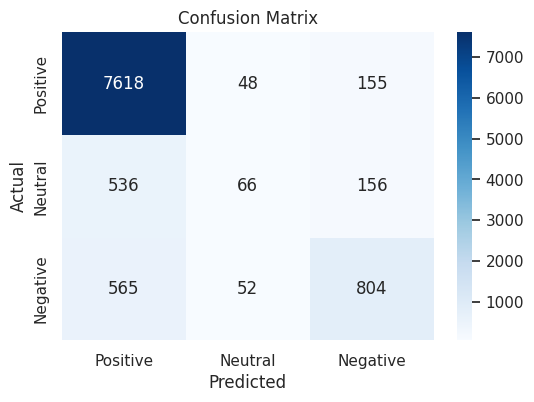

In [ ]:
# 7) Evaluate
y_pred = pipeline.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc*100:.2f}%\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred, labels=['Positive','Neutral','Negative'])
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Positive','Neutral','Negative'],
            yticklabels=['Positive','Neutral','Negative'], cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# 8) Show a few misclassified examples
results = pd.DataFrame({
    'text': X_test,
    'actual': y_test,
    'predicted': y_pred
}).reset_index(drop=True)

# show some wrong predictions
wrong = results[results['actual'] != results['predicted']].sample(n=8, random_state=42)
wrong[['text','actual','predicted']]


,text,actual,predicted
6031,i bought this tea on a subscribe save deal and received the boxes at less than a box the tea is rainforest certified so i appreciate the effort to help farmers that said the tea has no actual superfruit in it and doesn t taste very strongly of the natural flavors that were added to make it taste...,Neutral,Positive
4064,yamamotoyama s unsweetened iced green tea is unlike any green tea that i ve tasted this isn t a brewed tea but a powder that is dissolved in cold and preferably filtered water the resulting light taste and aroma is that of fresh tea leaves,Neutral,Positive
9083,there was nothing wrong with these bisquits other than the fact that they stated clearly small original assortment on the description but when the package arrived it was for large dogs i have pugs and they were too big for them i ended up having to break them all up to feed it to them please ens...,Neutral,Negative
6280,believe it or not i bought this at a yard sale for cents the packaging was perfect and looked exactly like the photo it doesn t expire for another months i can only figure the seller received the coffee as a gift and had no idea the cost i love coffee and figured this would be very good but was ...,Neutral,Positive
1975,i bought this after a fellow tea snob suggested it i wish i hadn t this is the first product made by republic of tea i have not loved the flavor is far weaker than their other teas i recommend getting your chocolate fix elsewhere if you are simply looking for the buzz that mate can bring there a...,Negative,Positive
9710,pure natural chocolate almond bars take some getting used to it is a heavy bar small but dense it actually looks like a fudge bar but has more of a brownie texture it isn t sweet but it isn t bland either but you can really taste the protein in it the first two bars that i ate i could not finish...,Positive,Neutral
1107,out of my cats will not touch this pretty pricey for alot of gravy grain little meat,Negative,Positive
2232,my dog was too small to move the covers with her mouth or paws i don t recommend for any dog under lbs,Negative,Positive


In [ ]:
# 9) Test on custom reviews
samples = [
    "This product is amazing, totally loved it and will buy again!",
    "Terrible. It arrived spoiled and tasted awful.",
    "It was okay. Not great but not bad either."
]
predictions = pipeline.predict(samples)
for s, p in zip(samples, predictions):
    print(f"\"{s}\" --> {p}")


"This product is amazing, totally loved it and will buy again!" --> Positive
"Terrible. It arrived spoiled and tasted awful." --> Negative
"It was okay. Not great but not bad either." --> Neutral


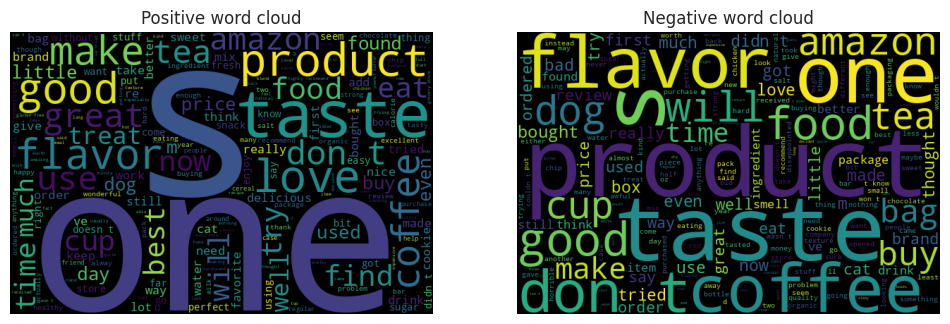

In [ ]:
# Optional: WordCloud (try to install if not present; Kaggle often has wordcloud installed)
try:
    from wordcloud import WordCloud
    pos_text = " ".join(df[df['Sentiment']=='Positive']['Clean_Text'].tolist())
    neg_text = " ".join(df[df['Sentiment']=='Negative']['Clean_Text'].tolist())

    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    WordCloud(width=600, height=400).generate(pos_text)
    plt.imshow(WordCloud(width=600, height=400).generate(pos_text))
    plt.axis('off')
    plt.title("Positive word cloud")

    plt.subplot(1,2,2)
    plt.imshow(WordCloud(width=600, height=400).generate(neg_text))
    plt.axis('off')
    plt.title("Negative word cloud")
    plt.show()
except Exception as e:
    print("WordCloud not available or failed:", e)


In [ ]:
# 10) Save model to /kaggle/working so you can download later
MODEL_PATH = '/kaggle/working/sentiment_pipeline.pkl'
joblib.dump(pipeline, MODEL_PATH)
print("Saved model to:", MODEL_PATH)


Saved model to: /kaggle/working/sentiment_pipeline.pkl


## ✅ Conclusion & Resume Line

**Conclusion:**  
We built an end-to-end sentiment classification pipeline using TF-IDF vectorization and Logistic Regression on the Amazon Fine Food Reviews dataset. The notebook includes data cleaning, feature extraction, model training, evaluation, and saving the trained model.

**Resume line example:**  
> Built a sentiment analysis pipeline on 50k Amazon product reviews using TF-IDF and Logistic Regression, achieving **~(insert accuracy here)%** accuracy to classify user reviews as Positive / Neutral / Negative. (Kaggle notebook & code on GitHub)

**Next steps / improvements:**  
- Use transformer-based models (BERT) for better accuracy.  
- Fine-tune hyperparameters and try class weighting or up/down sampling for class imbalance.  
- Deploy as a web app using Streamlit/Flask to demo real-time predictions.


**Model Accuracy:** 84.9%  
**Algorithm:** TF-IDF + Logistic Regression  
**Dataset:** 50,000 sampled Amazon Fine Food Reviews  
